# Preprocessing Data

**Importing libraries and reading the dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Once your Drive is mounted, you can access files using the path `/content/drive/My Drive/`. Replace `your_folder/your_file.csv` with the actual path to your file within Google Drive. For example, if your file is in a folder named 'my_data' in your Drive, the path would be `/content/drive/My Drive/my_data/your_file.csv`.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor


# Example: Reading a CSV file from Google Drive
# Replace 'your_folder/your_file.csv' with the actual path to your file
file_path = '/content/drive/My Drive/playground-series-s6e1/train.csv'
file_path2 = '/content/drive/My Drive/playground-series-s6e1/test.csv'
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    dft = pd.read_csv(file_path2)
    print("File loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the path is correct and your Drive is mounted.")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully!
File loaded successfully!


In [5]:
df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [6]:
dft.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
0,630000,24,other,ba,6.85,65.2,yes,5.2,poor,group study,high,easy
1,630001,18,male,diploma,6.61,45.0,no,9.3,poor,coaching,low,easy
2,630002,24,female,b.tech,6.60,98.5,yes,6.2,good,group study,medium,moderate
3,630003,24,male,diploma,3.03,66.3,yes,5.7,average,mixed,medium,moderate
4,630004,20,female,b.tech,2.03,42.4,yes,9.2,average,coaching,low,moderate


**Check for the data sanity**

(Any missing values? duplicates? garbage values?)

In [7]:
df.shape

(630000, 13)

In [8]:
dft.shape # it should be 12 columns because we excluded the exam score

(270000, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [10]:
df.isnull().sum()

,0
id,0
age,0
gender,0
course,0
study_hours,0
class_attendance,0
internet_access,0
sleep_hours,0
sleep_quality,0
study_method,0


In [11]:
dft.isnull().sum()

,0
id,0
age,0
gender,0
course,0
study_hours,0
class_attendance,0
internet_access,0
sleep_hours,0
sleep_quality,0
study_method,0


No missing values

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
dft.duplicated().sum()

np.int64(0)

No duplicates

In [14]:
for i in df.select_dtypes(include=['object']).columns:
    print(df[i].value_counts())
    print("***" * 10)

gender
other     211097
male      210593
female    208310
Name: count, dtype: int64
******************************
course
b.tech     131236
b.sc       111554
b.com      110932
bca         88721
bba         75644
ba          61989
diploma     49924
Name: count, dtype: int64
******************************
internet_access
yes    579423
no      50577
Name: count, dtype: int64
******************************
sleep_quality
poor       213675
good       213089
average    203236
Name: count, dtype: int64
******************************
study_method
coaching         131697
self-study       131131
mixed            123086
group study      123009
online videos    121077
Name: count, dtype: int64
******************************
facility_rating
medium    214082
low       212378
high      203540
Name: count, dtype: int64
******************************
exam_difficulty
moderate    353982
easy        176540
hard         99478
Name: count, dtype: int64
******************************


No garbage values

**EDA**

In [15]:
df.describe() #for numerical features

,id,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,20.545821,4.002337,71.987261,7.072758,62.506672
std,181865.479132,2.260238,2.359880,17.430098,1.744811,18.916884
min,0.000000,17.000000,0.080000,40.600000,4.100000,19.599000
25%,157499.750000,19.000000,1.970000,57.000000,5.600000,48.800000
50%,314999.500000,21.000000,4.000000,72.600000,7.100000,62.600000
75%,472499.250000,23.000000,6.050000,87.200000,8.600000,76.300000
max,629999.000000,24.000000,7.910000,99.400000,9.900000,100.000000


In [16]:
df.describe(include='object') #for categorical features

,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
count,630000,630000,630000,630000,630000,630000,630000
unique,3,7,2,3,5,3,3
top,other,b.tech,yes,poor,coaching,medium,moderate
freq,211097,131236,579423,213675,131697,214082,353982


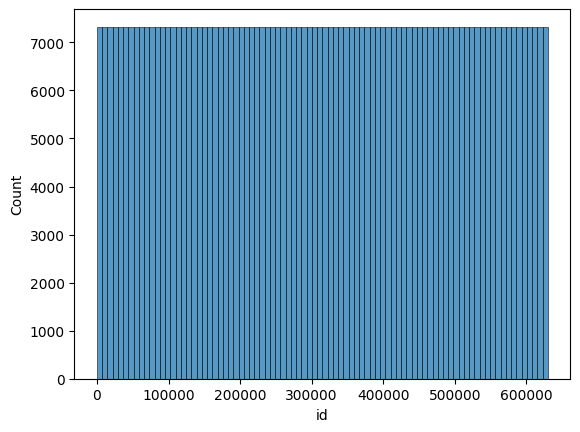

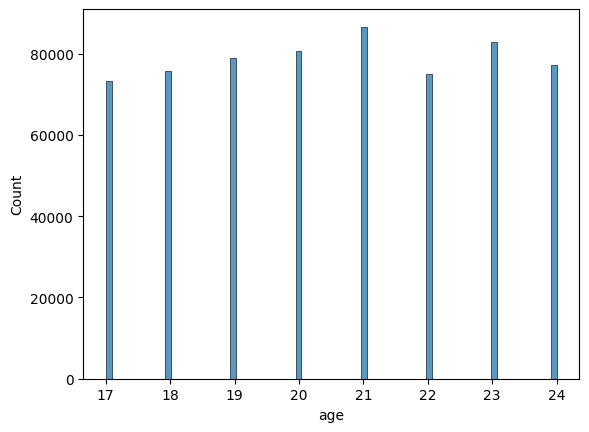

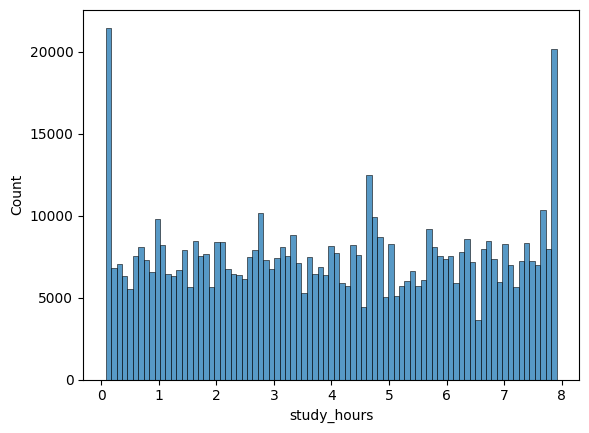

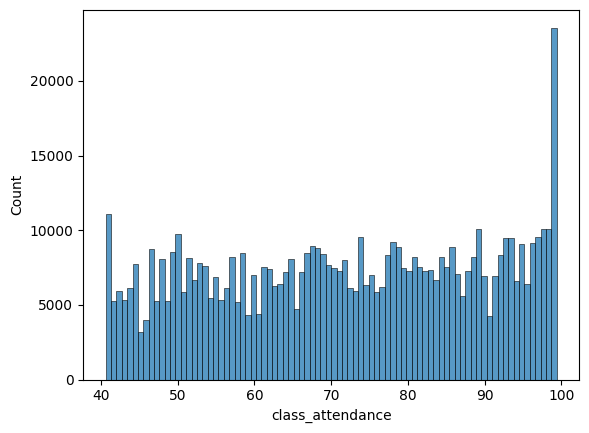

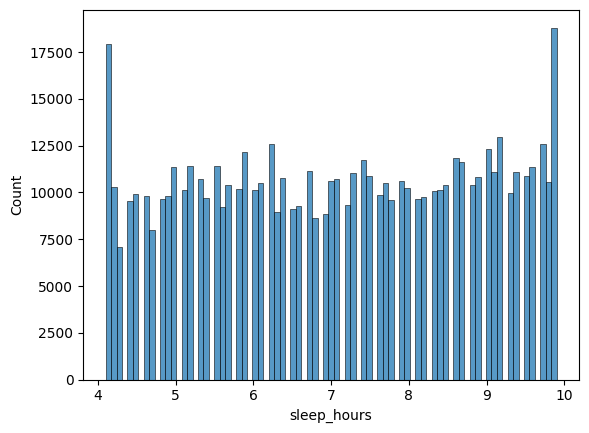

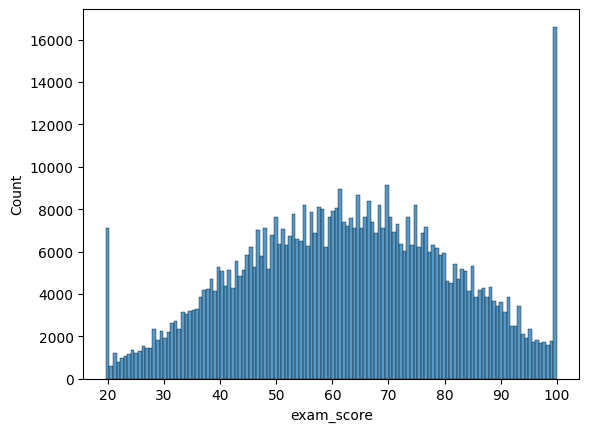

In [17]:
import warnings
warnings.filterwarnings('ignore')

# To understand the data distribution
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data= df, x= i)
  plt.show()

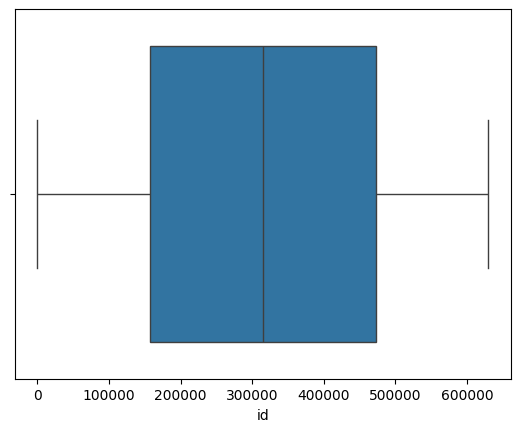

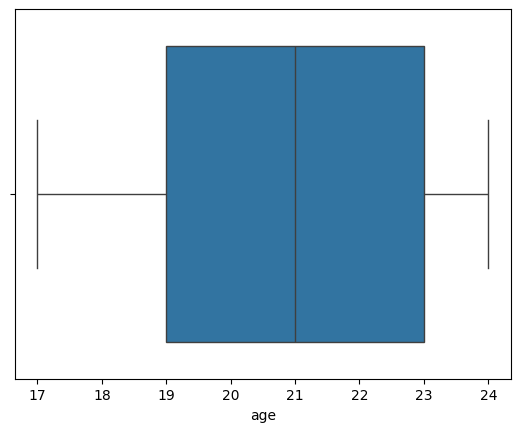

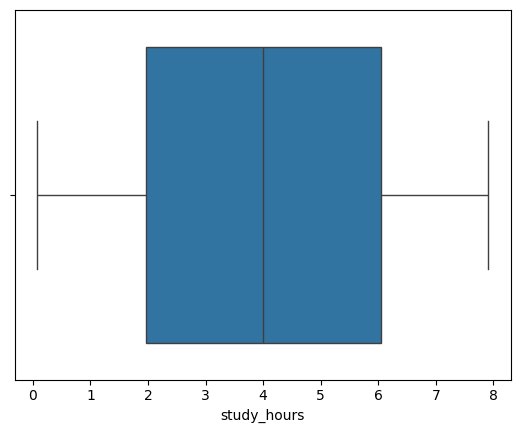

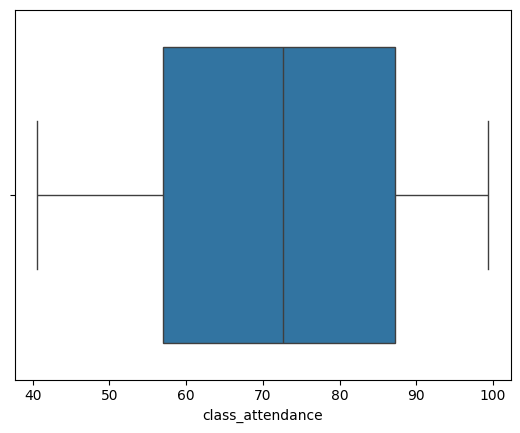

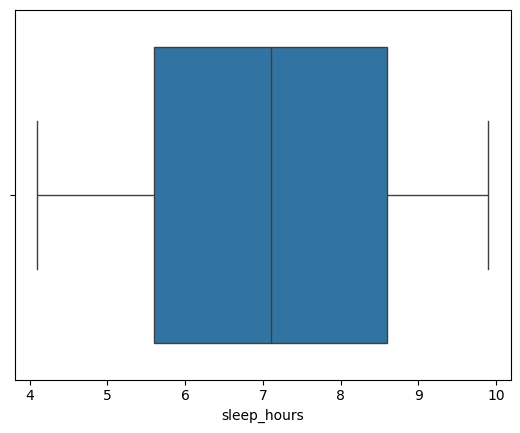

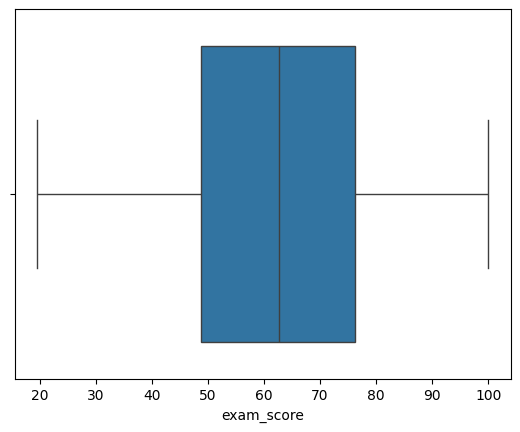

In [18]:
# To find any outliers
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data= df, x= i)
  plt.show()

No outliers

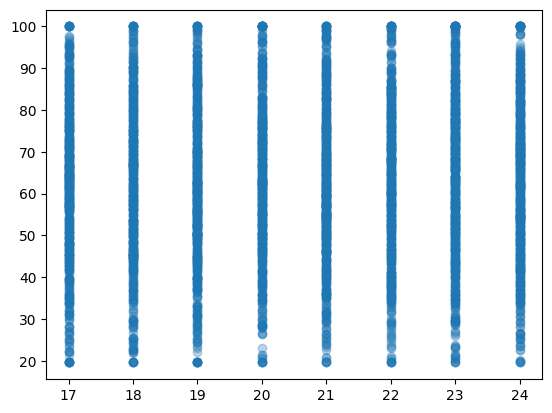

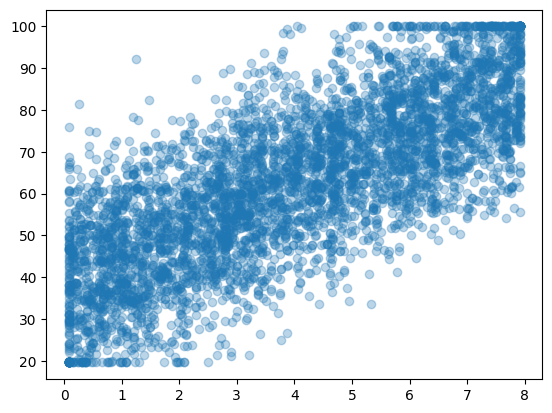

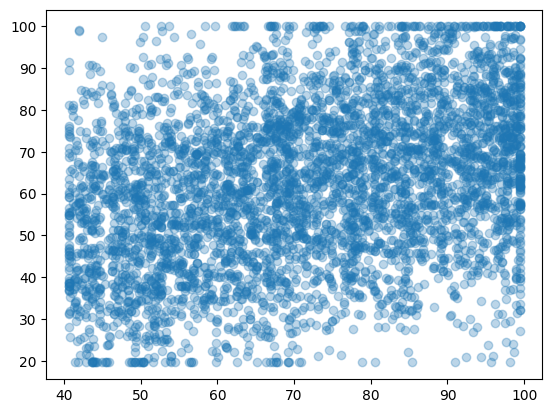

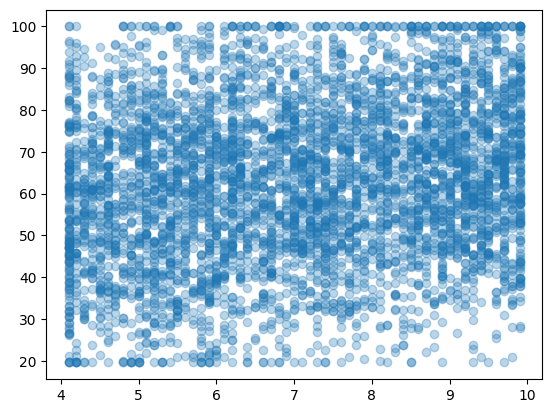

In [19]:
for i in ['age', 'study_hours', 'class_attendance', 'sleep_hours']:

# Diff ways of plotting since there's an overplotting

  #sns.scatterplot(data= df, x= i, y= 'exam_score', alpha=0.01, s=1)
  #plt.show()

  sample = df.sample(n=5000)  # Plot only 5000 random points
  plt.scatter(sample[i], sample['exam_score'], alpha=0.3)
  plt.show()

  #plt.hexbin(data= df, x= i, y= 'exam_score', gridsize=30, cmap='Blues')
  #plt.colorbar(label='count')
  #plt.show()

  #plt.hist2d(data= df, x= i, y= 'exam_score', bins=50, cmap='Blues')
  #plt.colorbar()
  #plt.show()

**Notes**

**Age:**
a very weak or no correlation between the two variables,
There's no clear diagonal pattern that would indicate a strong relationship. The data forms vertical stripes, meaning for each x-value (17, 18, 19, etc.), exam scores are spread across the full range from ~20 to 100. This suggests the x-variable doesn't predict exam performance well. And the **AGE**'s got a **uniform distribution**. Plus, The **Age** appears to be **discrete** integers (whole numbers), which is why you see distinct vertical columns rather than a continuous spread.

**Study hours:**
a strong positive correlation between study hours and exam scores. As study hours increase, exam scores generally increase,  the plot gets very dense in the upper right (7-8 study hours, 90-100 exam scores). Students who study more tend to score higher.

**Class attendance:** a moderate to strong positive correlation between class attendance and exam scores. In fact, high attendance doesn't guarantee high scores - Plenty of students with 90%+ attendance still score in the 60s, 70s, or 80s. It's not a tight relationship.

**Sleep hours:** almost no correlation, Whether students sleep 4 hours or 10 hours, exam scores are distributed fairly evenly from about 20 to 100. Sleep duration doesn't seem to predict performance.

**Encoding**

**One-hot encoding:** for features that have no natural order

In [20]:
dfe = pd.get_dummies(data= df, columns=['gender', 'course', 'internet_access', 'study_method'], dtype= int)
dfte = pd.get_dummies(data= dft, columns=['gender', 'course', 'internet_access', 'study_method'], dtype= int)
dfte = dfte.reindex(columns=dfe.columns, fill_value=0)

In [21]:
dfe

,id,age,study_hours,class_attendance,sleep_hours,sleep_quality,facility_rating,exam_difficulty,exam_score,gender_female,...,course_bba,course_bca,course_diploma,internet_access_no,internet_access_yes,study_method_coaching,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study
0,0,21,7.91,98.8,4.9,average,low,easy,78.300,1,...,0,0,0,1,0,0,0,0,1,0
1,1,18,4.95,94.8,4.7,poor,medium,moderate,46.700,0,...,0,0,1,0,1,0,0,0,0,1
2,2,20,4.68,92.6,5.8,poor,high,moderate,99.000,1,...,0,0,0,0,1,1,0,0,0,0
3,3,19,2.00,49.5,8.3,average,high,moderate,63.900,0,...,0,0,0,0,1,0,1,0,0,0
4,4,23,7.65,86.9,9.6,good,high,easy,100.000,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,629995,18,4.86,70.7,4.1,good,high,moderate,69.500,1,...,0,0,0,0,1,0,0,1,0,0
629996,629996,21,7.08,54.4,4.5,average,low,moderate,78.900,1,...,0,0,0,0,1,0,0,1,0,0
629997,629997,24,0.64,44.2,4.3,poor,low,moderate,19.599,0,...,0,1,0,0,1,0,0,0,1,0
629998,629998,20,1.54,75.1,8.2,average,high,moderate,59.100,0,...,0,0,0,0,1,0,1,0,0,0


**Label encoding:** for ranked / natural ordered features

In [22]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['sleep_quality', 'facility_rating', 'exam_difficulty']

for c in columns_to_encode:
  le = LabelEncoder()
  dfe[c] = le.fit_transform(df[c])
  dfte[c] = le.transform(dft[c])
  dfe = dfe.drop(c, axis=1)
  dfte = dfte.drop(c, axis=1)


In [23]:
dfe

,id,age,study_hours,class_attendance,sleep_hours,exam_score,gender_female,gender_male,gender_other,course_b.com,...,course_bba,course_bca,course_diploma,internet_access_no,internet_access_yes,study_method_coaching,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study
0,0,21,7.91,98.8,4.9,78.300,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,18,4.95,94.8,4.7,46.700,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,20,4.68,92.6,5.8,99.000,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,3,19,2.00,49.5,8.3,63.900,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,4,23,7.65,86.9,9.6,100.000,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,629995,18,4.86,70.7,4.1,69.500,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
629996,629996,21,7.08,54.4,4.5,78.900,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
629997,629997,24,0.64,44.2,4.3,19.599,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
629998,629998,20,1.54,75.1,8.2,59.100,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0


In [24]:
dfte

,id,age,study_hours,class_attendance,sleep_hours,exam_score,gender_female,gender_male,gender_other,course_b.com,...,course_bba,course_bca,course_diploma,internet_access_no,internet_access_yes,study_method_coaching,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study
0,630000,24,6.85,65.2,5.2,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1,630001,18,6.61,45.0,9.3,0,0,1,0,0,...,0,0,1,1,0,1,0,0,0,0
2,630002,24,6.60,98.5,6.2,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,630003,24,3.03,66.3,5.7,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
4,630004,20,2.03,42.4,9.2,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,899995,21,2.55,82.3,8.4,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
269996,899996,17,0.49,46.4,8.8,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
269997,899997,22,6.62,74.7,5.5,0,0,1,0,0,...,1,0,0,0,1,1,0,0,0,0
269998,899998,22,4.08,51.8,8.7,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [25]:
dfte = dfte.drop('exam_score', axis=1)

**Max-Min Scaling**

In [26]:
column_names = dfe.columns.tolist()
index_values = dfe.index.tolist()
column_names1 = dfte.columns.tolist()
index_values1 = dfte.index.tolist()

In [27]:
from sklearn.preprocessing import MinMaxScaler
s1 = MinMaxScaler()
s2 = MinMaxScaler()

dfe = s1.fit_transform(dfe)
dfte = s2.fit_transform(dfte)

In [28]:
dfes = pd.DataFrame(dfe, columns=column_names, index=index_values)
dftes = pd.DataFrame(dfte, columns=column_names1, index=index_values1)

In [29]:
dfes

,id,age,study_hours,class_attendance,sleep_hours,exam_score,gender_female,gender_male,gender_other,course_b.com,...,course_bba,course_bca,course_diploma,internet_access_no,internet_access_yes,study_method_coaching,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study
0,0.000000,0.571429,1.000000,0.989796,0.137931,0.730103,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000002,0.142857,0.621967,0.921769,0.103448,0.337073,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.000003,0.428571,0.587484,0.884354,0.293103,0.987562,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.000005,0.285714,0.245211,0.151361,0.724138,0.551001,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.000006,0.857143,0.966794,0.787415,0.948276,1.000000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,0.999994,0.142857,0.610473,0.511905,0.000000,0.620651,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
629996,0.999995,0.571429,0.893997,0.234694,0.068966,0.737565,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
629997,0.999997,1.000000,0.071520,0.061224,0.034483,0.000000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
629998,0.999998,0.428571,0.186462,0.586735,0.706897,0.491300,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [30]:
dftes

,id,age,study_hours,class_attendance,sleep_hours,gender_female,gender_male,gender_other,course_b.com,course_b.sc,...,course_bba,course_bca,course_diploma,internet_access_no,internet_access_yes,study_method_coaching,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study
0,0.000000,1.000000,0.864623,0.418367,0.189655,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.000004,0.142857,0.833972,0.074830,0.896552,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.000007,1.000000,0.832695,0.984694,0.362069,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.000011,1.000000,0.376756,0.437075,0.275862,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.000015,0.428571,0.249042,0.030612,0.879310,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,0.999985,0.571429,0.315453,0.709184,0.741379,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
269996,0.999989,0.000000,0.052363,0.098639,0.810345,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
269997,0.999993,0.714286,0.835249,0.579932,0.241379,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
269998,0.999996,0.714286,0.510856,0.190476,0.793103,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


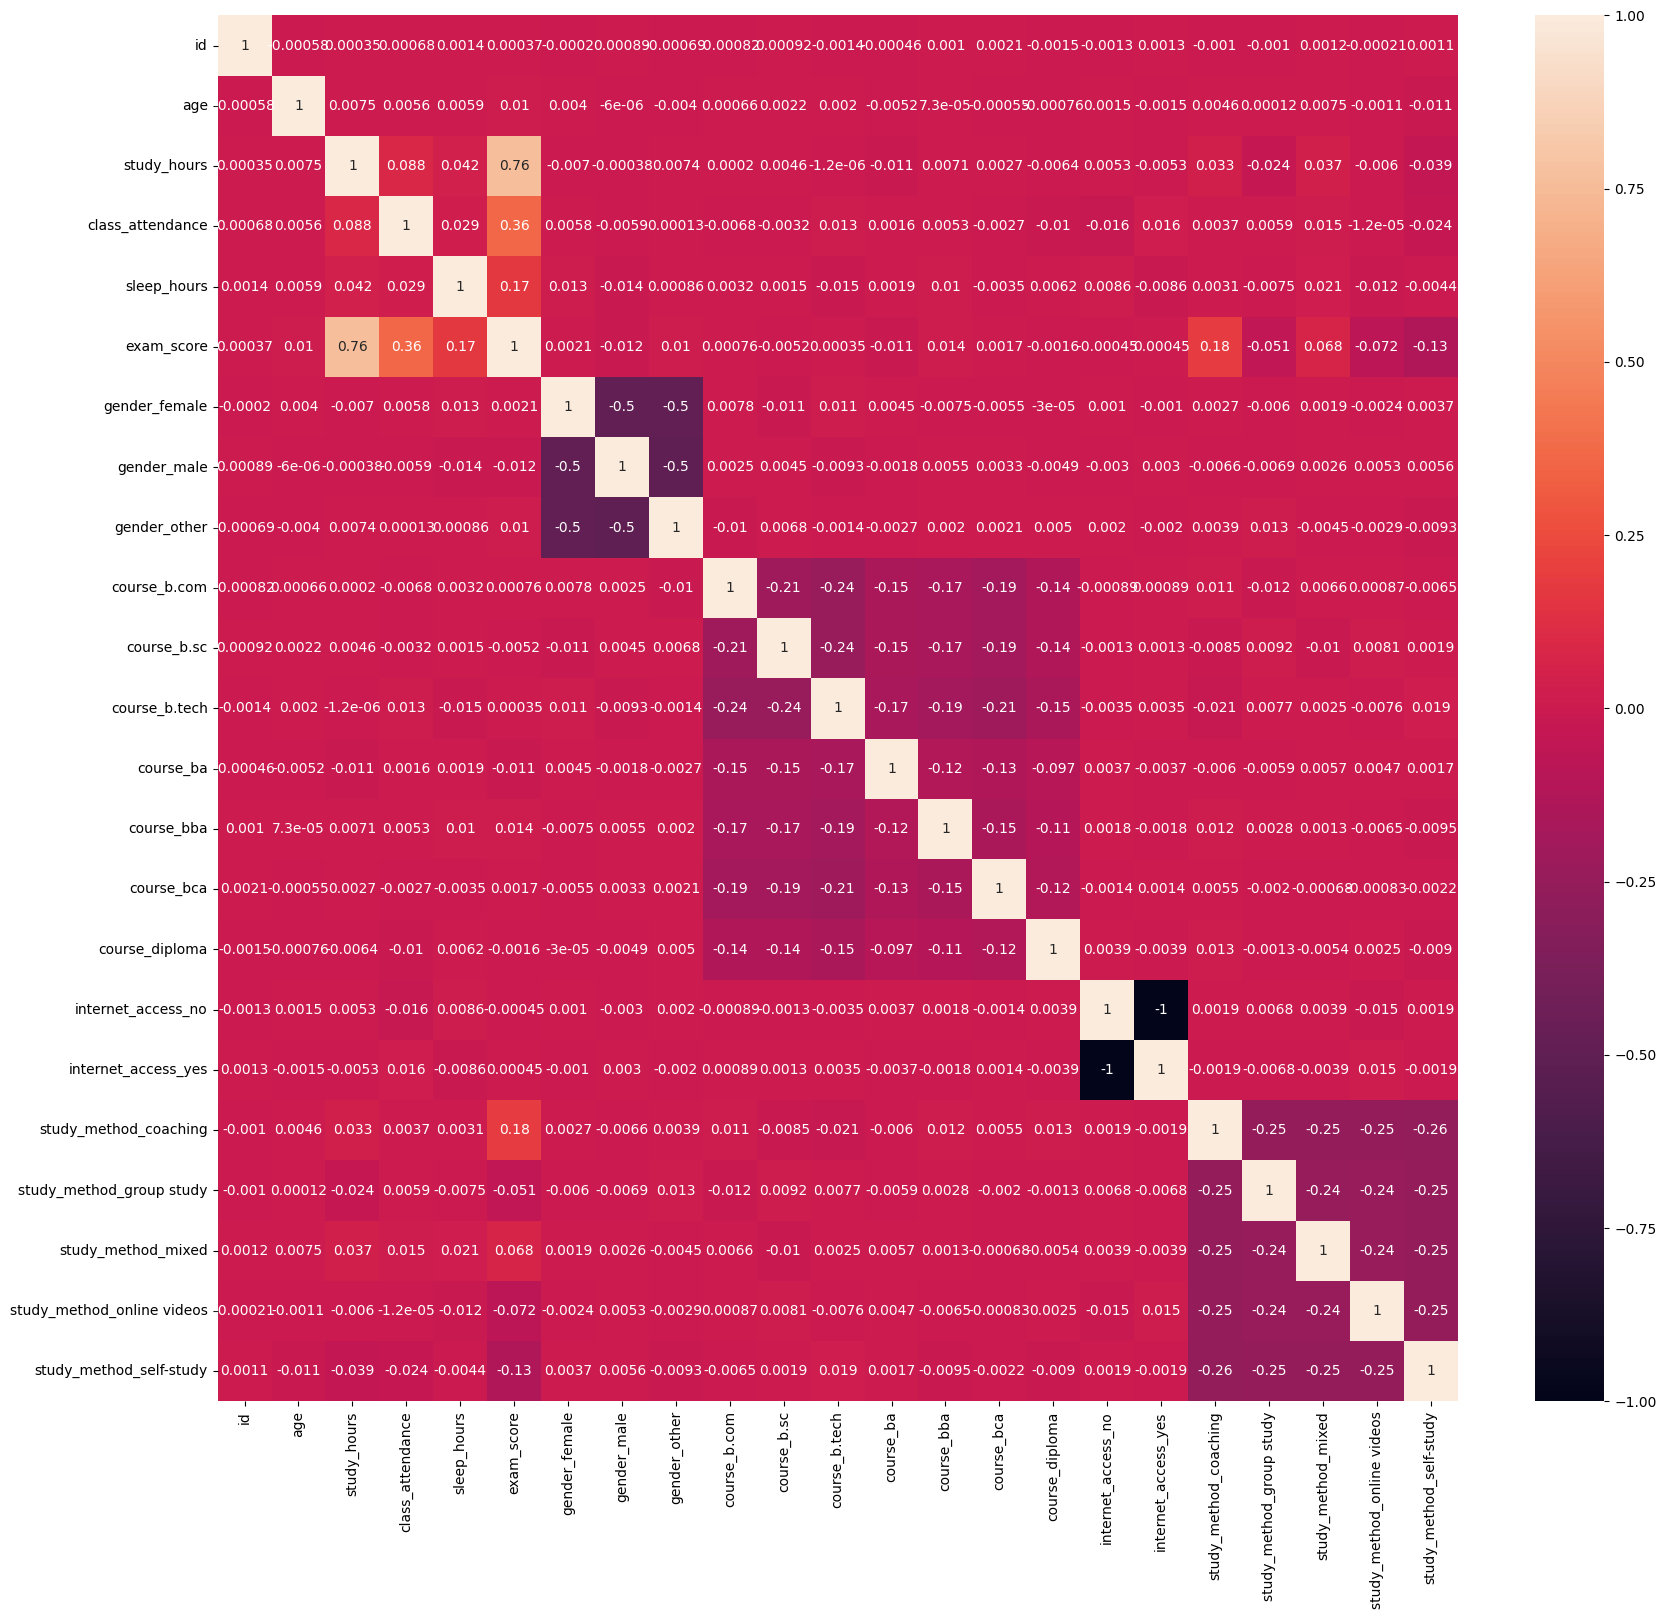

In [31]:
# Check the correlation
plt.figure(figsize=(20, 18))
sns.heatmap(dfes.corr(), annot=True)
plt.show()

# Building the Model

**Linear Regression**

In [32]:
X = dfes.drop('exam_score', axis=1)
y = dfes['exam_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def evaluate_model(name, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, preds)
    print(f"{name} RMSE: {rmse}")



In [33]:
lr = LinearRegression()
evaluate_model("Linear Regression", lr)

Linear Regression MSE: 0.0157
Linear Regression RMSE: 0.1252


In [ ]:
svr = SVR(
        kernel="rbf",
        C=3,            # smaller = faster + stable
        epsilon=0.2,
        gamma="scale"
    )
evaluate_model("SVR", svr)

In [ ]:
rf = RandomForestRegressor(
    n_estimators=60,
    max_depth=5,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)
evaluate_model("Random Forest", rf)


In [ ]:
xgb = XGBRegressor(
    n_estimators=80,
    max_depth=4,
    learning_rate=0.08,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist",   # VERY fast in Colab
    random_state=42,
    n_jobs=-1
)
evaluate_model("XGBoost", xgb)

In [ ]:
X = dfes.drop('exam_score', axis=1)
y = dfes['exam_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

base_models = [
    ("lr", LinearRegression()),

    ("svm", SVR(
        kernel="rbf",
        C=3,
        epsilon=0.2,
        gamma="scale"
    )),

    ("rf", RandomForestRegressor(
        n_estimators=30,
        max_depth=4,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1
    )),

    ("xgb", XGBRegressor(
        n_estimators=60,
        learning_rate=0.08,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method="hist",
        random_state=42,
        n_jobs=1
    ))
]

meta_model = LinearRegression()

stack = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=3,
    n_jobs=-1
)

stack.fit(X_train, y_train)

y_pred = stack.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Stacking RMSE:", rmse)

In [ ]:
from sklearn.model_selection import train_test_split, root_mean_squared_error
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=100,
        n_jobs=-1,
        random_state=42
    ),
    "XGBoost": XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        tree_method="hist",   # very important for speed
        n_jobs=-1,
        random_state=42
    )
}

kf = KFold(n_splits=3, shuffle=True, random_state=42)

y_mean = np.mean(y)  # for percentage interpretation (optional)

for name, model in models.items():
    rmse_scores = []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        rmse = np.root_mean_squared_error(y_val, y_pred)
        rmse_scores.append(rmse)

    rmse_scores = np.array(rmse_scores)

    rmse_mean = rmse_scores.mean()
    rmse_std = rmse_scores.std()
    rmse_percent = (rmse_mean / y_mean) * 100

    print(f"{name}")
    print(f"  RMSE: {rmse_scores}")